In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import community
from community import community_louvain
import random
#from networkx import *
import graphviz
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout 

In [4]:
#read the Facebook graph fromfile
G = nx.read_edgelist('facebook_combined.txt.gz', nodetype=int)

In [6]:
# Compute the partition of the graph nodes which maximises the modularity using the Louvain heuristices
partition = community_louvain.best_partition(G) 
print(community_louvain.modularity(partition, G))

0.834914667965772


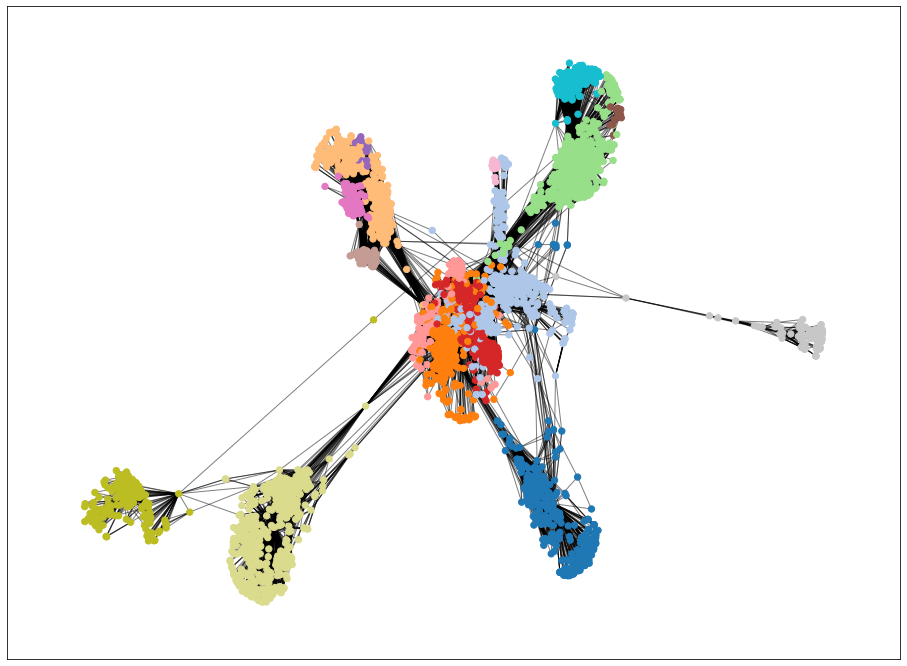

In [7]:
#Clustering

plt.figure(figsize=(16, 12))

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
node_list = [n for n, n_com in sorted(partition.items())]
node_colors = [n_com for n, n_com in sorted(partition.items())]
    
nx.draw_networkx_nodes(G, pos, node_list, node_size=40, 
                       # the arguments below here make each community a different color
                       vmin=0, vmax=size,
                       node_color=node_colors, cmap=plt.cm.tab20)
    #print(count)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [8]:
#hierarchical clustering
dendrogram = community_louvain.generate_dendrogram(G)
for level in range(len(dendrogram)) :
    print("partition at level", level, "is", community_louvain.partition_at_level(dendrogram, level))
    print(set(community_louvain.partition_at_level(dendrogram, level).values()))

partition at level 0 is {0: 10, 1: 10, 2: 2, 3: 10, 4: 53, 5: 10, 6: 17, 7: 10, 8: 50, 9: 10, 10: 10, 11: 10, 12: 10, 13: 10, 14: 2, 15: 10, 16: 10, 17: 2, 18: 10, 19: 2, 20: 2, 21: 10, 22: 10, 23: 10, 24: 58, 25: 10, 26: 10, 27: 10, 28: 2, 29: 10, 30: 10, 31: 10, 32: 2, 33: 42, 34: 16, 35: 46, 36: 10, 37: 10, 38: 10, 39: 10, 40: 10, 41: 2, 42: 42, 43: 10, 44: 2, 45: 10, 46: 46, 47: 10, 48: 10, 49: 44, 50: 10, 51: 10, 52: 36, 53: 58, 54: 10, 55: 10, 56: 10, 57: 58, 58: 68, 59: 10, 60: 10, 61: 10, 62: 10, 63: 10, 64: 10, 65: 10, 66: 10, 67: 10, 68: 46, 69: 10, 70: 59, 71: 59, 72: 10, 73: 10, 74: 10, 75: 10, 76: 10, 77: 10, 78: 53, 79: 10, 80: 58, 81: 10, 82: 10, 83: 10, 84: 10, 85: 10, 86: 46, 87: 10, 88: 10, 89: 17, 90: 29, 91: 50, 92: 58, 93: 2, 94: 58, 95: 17, 96: 10, 97: 32, 98: 10, 99: 46, 100: 10, 101: 58, 102: 46, 103: 10, 104: 10, 105: 10, 106: 10, 107: 1, 108: 10, 109: 10, 110: 50, 111: 2, 112: 28, 113: 10, 114: 10, 115: 2, 116: 2, 117: 10, 118: 10, 119: 10, 120: 10, 121: 10, 1

0 4039
1 95
2 19


/usr/local/lib/python3.8/dist-packages/pygraphviz/agraph.py:1405: RuntimeWarning: Warning: 1 is not a known color.

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


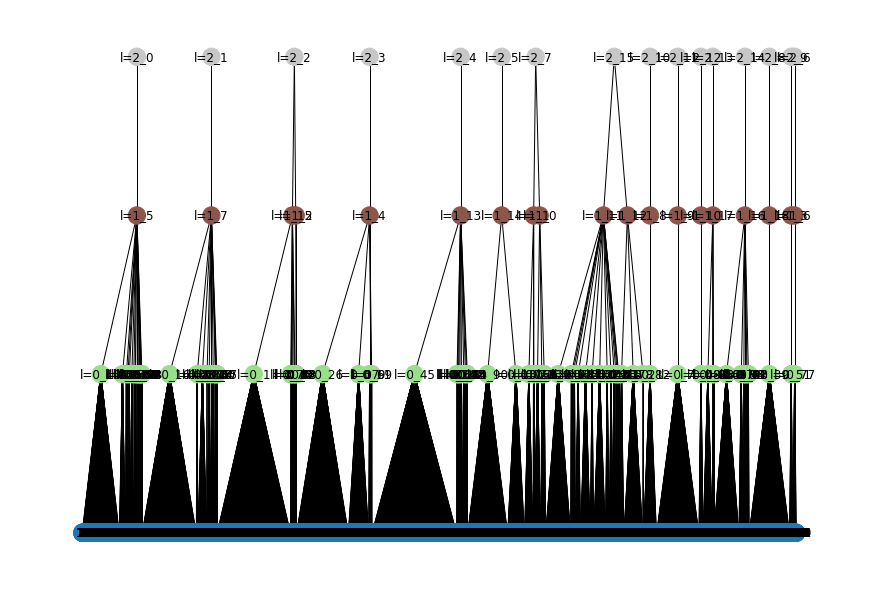

In [9]:
pg = nx.DiGraph()

last_part = None
for l, part in enumerate(dendrogram):
    print(l, len(part))
    for n, comm in part.items():
        # level = ?, community = ?
        nom = "l={}_{}".format(l, comm)
        pg.add_node(nom, comm=comm, color=l+1)

        if l == 0:
            pg.add_node(n, comm=comm, color=0)
            pg.add_edge(nom, n)
        else: 
            pg.add_edge(nom, "l={}_{}".format(l-1, n))
    last_part = part
   

plt.figure(figsize=(12,8))

colors = list(nx.get_node_attributes(pg, 'color').values())

pos = graphviz_layout(pg, prog='dot')
nx.draw(pg, pos, with_labels=True, arrows=False, node_color=colors, vmin=0, vmax=len(dendrogram) + 1, cmap=plt.cm.tab20)

In [ ]:

# find 10-clique communities
communities = list(nx.algorithms.community.k_clique_communities(G, 10))

# print the resulting communities
for i, comm in enumerate(communities):
    print("Community {}:".format(i))
    print(comm)